#### we will collect the data
#### preprocess the data train and test 
#### create a stacked LSTM model 
#### predict the test data and plot the ouput 
#### predict the future 30 days and plot the output 


In [149]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import keras
import seaborn as sns
import pandas_datareader as pdr 
apikey = "3ee15cb887bbe90a9d9003af95f6b83548953240"
path= r"C:\Users\kaifk\lpth\.vscode\DataSciencePrac\applestock\apple_share_price.csv"

In [150]:
!pip install yfinance




[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
import datetime
import pandas_datareader.tiingo as tiingo
import yfinance as yf
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2020, 12, 31)
df = yf.download('AAPL', start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   40.722885   
2018-01-03   43.132500   43.637501   42.990002   43.057499   40.715771   
2018-01-04   43.134998   43.367500   43.020000   43.257500   40.904903   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.370625   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.216957   
...                ...         ...         ...         ...         ...   
2020-12-23  132.160004  132.429993  130.779999  130.960007  128.687241   
2020-12-24  131.320007  133.460007  131.100006  131.970001  129.679749   
2020-12-28  133.990005  137.339996  133.509995  136.690002  134.317795   
2020-12-29  138.050003  138.789993  134.339996  134.869995  132.529404   
2020-12-30  135.580002  135.990005  133.399

In [152]:
df.to_csv('apple.csv')

In [153]:
df=pd.read_csv('apple.csv')

In [154]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722885,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715771,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370625,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216957,82271200


In [155]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
750,2020-12-23,132.160004,132.429993,130.779999,130.960007,128.687241,88223700
751,2020-12-24,131.320007,133.460007,131.100006,131.970001,129.679749,54930100
752,2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317795,124486200
753,2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529404,121047300
754,2020-12-30,135.580002,135.990005,133.399994,133.720001,131.399368,96452100


In [156]:
df2=df.reset_index()['Close']
df2

0       43.064999
1       43.057499
2       43.257500
3       43.750000
4       43.587502
          ...    
750    130.960007
751    131.970001
752    136.690002
753    134.869995
754    133.720001
Name: Close, Length: 755, dtype: float64

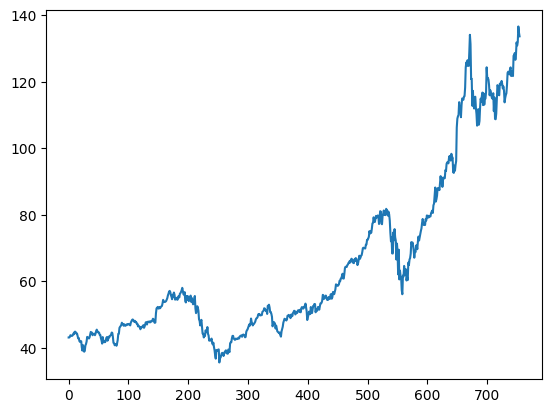

In [157]:
plt.plot(df2)

In [158]:
#lstm is sensitive to the scale of the data so we apply minmax scaler


In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2= scaler.fit_transform(np.array(df2).reshape(-1,1))


In [160]:
df2

array([[0.07432581],
       [0.07425166],
       [0.07622907],
       [0.08109844],
       [0.07949181],
       [0.07944237],
       [0.07934348],
       [0.08179053],
       [0.08626441],
       [0.08403984],
       [0.09123267],
       [0.09162813],
       [0.08965075],
       [0.08604196],
       [0.08614082],
       [0.07917047],
       [0.0714833 ],
       [0.07247199],
       [0.06369727],
       [0.06125021],
       [0.0623872 ],
       [0.06325233],
       [0.04525792],
       [0.03534618],
       [0.05151147],
       [0.04288502],
       [0.03203399],
       [0.03514843],
       [0.05072053],
       [0.05474947],
       [0.0622389 ],
       [0.07613022],
       [0.074746  ],
       [0.07331241],
       [0.07138444],
       [0.07491904],
       [0.08233432],
       [0.09091133],
       [0.08947771],
       [0.08881032],
       [0.08109844],
       [0.08408929],
       [0.08559706],
       [0.08522628],
       [0.08117259],
       [0.08589366],
       [0.0934078 ],
       [0.097

In [161]:
# time series data depends on the time 
# sequence of data , next data is depenedent of the previous data 


In [162]:
train_size = int(len(df2)*0.65)
test_size =int(len(df2))-train_size
traindata , testdata = df2[0:train_size,:],df2[train_size:len(df2),:1]
print("Train data size : ", len(traindata))
print("Test data size  : ", len(testdata))

Train data size :  490
Test data size  :  265


In [163]:
#consider timesteps (how many previous days to be dependend upon )

# data = 120,130,140,134,150
# xtrain    y_train 
# f1 f2 f3    o/p
# 120 130    125 -> 140 (dependent on the previous 3)
# 130 140    134 -> 150

In [164]:
def createData(dataset,time_step=1):
    datax , datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]  ### 0-99 
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)


In [165]:
# reshape  =into x = t , t+1 ,t+2,t+3 and y = t+4
# //===============================
time_step=70
xtrain ,ytrain = createData(traindata,time_step)
xtest  ,ytest   = createData(testdata,time_step)

In [166]:
xtrain

array([[0.07432581, 0.07425166, 0.07622907, ..., 0.07677286, 0.07477074,
        0.07897273],
       [0.07425166, 0.07622907, 0.08109844, ..., 0.07477074, 0.07897273,
        0.08043106],
       [0.07622907, 0.08109844, 0.07949181, ..., 0.07897273, 0.08043106,
        0.0831253 ],
       ...,
       [0.15656128, 0.16516299, 0.16449564, ..., 0.28983861, 0.29549889,
        0.30499044],
       [0.16516299, 0.16449564, 0.15698147, ..., 0.29549889, 0.30499044,
        0.31767058],
       [0.16449564, 0.15698147, 0.16560793, ..., 0.30499044, 0.31767058,
        0.30830266]])

In [167]:
xtrain.shape
ytrain.shape

(419,)

In [168]:
# reshape input to be [samples , time steps , feautres ] required for lstm 
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1 )
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1 )

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM



In [170]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(70,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [171]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 70, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100


7/7 [==============================] - 27s 1s/step - loss: 0.0107 - val_loss: 0.0417
Epoch 2/100
7/7 [==============================] - 1s 207ms/step - loss: 0.0025 - val_loss: 0.1277
Epoch 3/100
7/7 [==============================] - 1s 191ms/step - loss: 0.0020 - val_loss: 0.0422
Epoch 4/100
7/7 [==============================] - 1s 213ms/step - loss: 0.0015 - val_loss: 0.0462
Epoch 5/100
7/7 [==============================] - 1s 182ms/step - loss: 0.0010 - val_loss: 0.0118
Epoch 6/100
7/7 [==============================] - 1s 201ms/step - loss: 7.7900e-04 - val_loss: 0.0047
Epoch 7/100
7/7 [==============================] - 2s 238ms/step - loss: 7.3180e-04 - val_loss: 0.0076
Epoch 8/100
7/7 [==============================] - 1s 202ms/step - loss: 6.3518e-04 - val_loss: 0.0039
Epoch 9/100
7/7 [==============================] - 1s 214ms/step - loss: 5.4882e-04 - val_loss: 0.0037
Epoch 10/100
7/7 [==============================] - 1s 205ms/step - loss: 5.1485e-04 - val_loss: 0.0041
Epo

In [173]:
trainpred = model.predict(xtrain)
testpred=model.predict(xtest)


7/7 [==============================] - 0s 58ms/step


In [174]:
trainpred= scaler.inverse_transform(trainpred)
testpred =scaler.inverse_transform(testpred)


In [175]:
# loss 
from sklearn.metrics import mean_squared_error
import math 
m=math.sqrt(mean_squared_error(ytrain,trainpred))
n=math.sqrt(mean_squared_error(ytest,testpred))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest,testpred)
print(mae)
print(m,n)

105.44283386796245
50.26277755708509 108.64445519858731


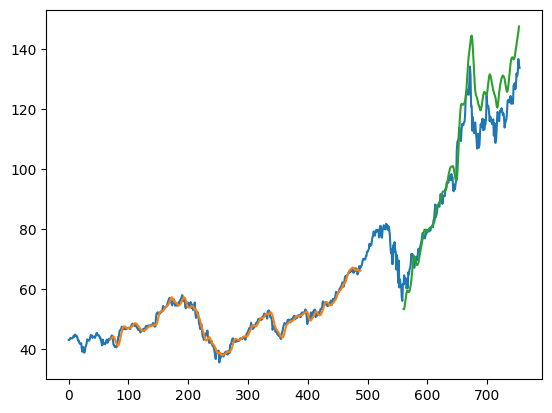

In [188]:
look =70
trainpredictplot= np.empty_like(df2)
trainpredictplot[:,:]= np.nan
trainpredictplot[look:len(trainpred)+look,:]= trainpred
testpredictplot = np.empty_like(df2)
testpredictplot[:,:] = np.nan
testpredictplot[len(trainpred)+(look*2)+1:len(df2)-1,:] = testpred
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


> - green line is the test data
> - orange one is the train data 
> - blue is the whole data 

In [177]:
len(testdata)

265

In [189]:
x_input = testdata[195:].reshape(1,-1)
x_input.shape

(1, 70)

In [190]:
x_input

array([[0.75401039, 0.70764022, 0.71851595, 0.75865731, 0.78515458,
        0.77655283, 0.79355855, 0.80324788, 0.7659737 , 0.80038063,
        0.76735795, 0.78634105, 0.78525347, 0.80502755, 0.87848826,
        0.845861  , 0.84675087, 0.84200506, 0.82529594, 0.7952394 ,
        0.81036656, 0.80403886, 0.79296535, 0.78594556, 0.78604445,
        0.80136932, 0.74797929, 0.78871392, 0.72484365, 0.72395378,
        0.74046519, 0.78505569, 0.82539483, 0.82203327, 0.79860096,
        0.79514051, 0.82994286, 0.8271745 , 0.82766888, 0.83795141,
        0.82895417, 0.81550779, 0.82153889, 0.80868571, 0.77417996,
        0.78723085, 0.79573371, 0.80127043, 0.82559261, 0.86187803,
        0.86543737, 0.86405319, 0.85723111, 0.87206167, 0.87829048,
        0.85258419, 0.86701926, 0.85881308, 0.85258419, 0.91289512,
        0.91220303, 0.92100249, 0.900833  , 0.91635557, 0.95244336,
        0.9433473 , 0.95333316, 1.        , 0.98200551, 0.97063548]])

In [191]:
temp_inp =list(x_input)
temp_inp=temp_inp[0].tolist()
temp_inp


[0.7540103870045524,
 0.7076402189040466,
 0.7185159482384712,
 0.7586573080535116,
 0.7851545792961426,
 0.7765528270077203,
 0.7935585485349196,
 0.8032478812999974,
 0.7659736968156324,
 0.8003806305371898,
 0.7673579518667567,
 0.7863410512976211,
 0.7852534708209656,
 0.805027551586149,
 0.8784882646460913,
 0.8458610012106856,
 0.8467508740698274,
 0.8420050614960454,
 0.825295939111183,
 0.7952394027283801,
 0.8103665624446047,
 0.8040388626343163,
 0.792965350250246,
 0.7859455606304616,
 0.7860444521552844,
 0.8013693194890227,
 0.7479792863366009,
 0.7887139198684464,
 0.7248436480487593,
 0.7239537751896176,
 0.7404651899569658,
 0.7850556877713201,
 0.825394830636006,
 0.8220332731133478,
 0.7986009602510381,
 0.7951405112035573,
 0.8299428601601423,
 0.8271745009221577,
 0.8276688831141402,
 0.8379514141638912,
 0.8289541712083096,
 0.8155077902534141,
 0.8215388909213658,
 0.8086857082511437,
 0.7741799584368952,
 0.7872308487246312,
 0.7957337094882307,
 0.80127042796419

In [192]:
from numpy import array
n_steps = 70
i=0
lst_out=[]
while(i<30):
    if(len(temp_inp)>70):
        x_input = np.array(temp_inp[1:])
        print(f"{i} day input {x_input}")
        x_input= x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        print(f"{i} day input {yhat}")
        temp_inp = temp_inp[1:]
        lst_out.extend(yhat.tolist())
        i+=1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        print(f"yhat == {yhat[0]}")
        temp_inp.extend(yhat[0].tolist())
        lst_out.extend(yhat.tolist())
        i+=1

print(lst_out)
        



yhat == [1.1394006]
1 day input [0.70764022 0.71851595 0.75865731 0.78515458 0.77655283 0.79355855
 0.80324788 0.7659737  0.80038063 0.76735795 0.78634105 0.78525347
 0.80502755 0.87848826 0.845861   0.84675087 0.84200506 0.82529594
 0.7952394  0.81036656 0.80403886 0.79296535 0.78594556 0.78604445
 0.80136932 0.74797929 0.78871392 0.72484365 0.72395378 0.74046519
 0.78505569 0.82539483 0.82203327 0.79860096 0.79514051 0.82994286
 0.8271745  0.82766888 0.83795141 0.82895417 0.81550779 0.82153889
 0.80868571 0.77417996 0.78723085 0.79573371 0.80127043 0.82559261
 0.86187803 0.86543737 0.86405319 0.85723111 0.87206167 0.87829048
 0.85258419 0.86701926 0.85881308 0.85258419 0.91289512 0.91220303
 0.92100249 0.900833   0.91635557 0.95244336 0.9433473  0.95333316
 1.         0.98200551 0.97063548 1.1394006 ]
1 day input [[1.169175]]
yhat == [1.169175]
3 day input [0.71851595 0.75865731 0.78515458 0.77655283 0.79355855 0.80324788
 0.7659737  0.80038063 0.76735795 0.78634105 0.78525347 0.8050

In [193]:
day_new = np.arange(1,71)
day_pred= np.arange(71,101)

In [194]:
len(df2)

755

In [195]:
755-70

685

In [196]:
df3 = df2.tolist()
df3.extend(lst_out)


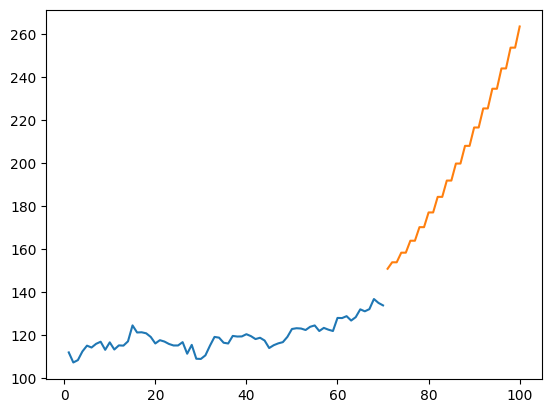

In [197]:
plt.plot(day_new,scaler.inverse_transform(df2[685:]))
plt.plot(day_pred,scaler.inverse_transform(lst_out))

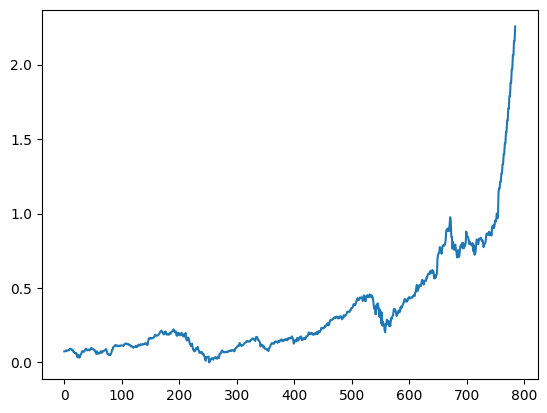

In [187]:
df3= df2.tolist()
df3.extend(lst_out)
plt.plot(df3)